<a href="https://colab.research.google.com/github/duybluemind1988/project_py/blob/main/Churn/Churn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get data

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data analysis

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
print(X_train.shape)
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_train = X_train.dropna()
print(X_train.shape) # remove 7 values

(4507, 20)
(4500, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(X_test.shape)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
X_test = X_test.dropna()
print(X_test.shape) # remove 7 values

(1409, 20)
(1407, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Sweetvis

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(X_train)
my_report.show_html("analyze.html",open_browser=False) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
import IPython
IPython.display.HTML("analyze.html")

In [ ]:
compare_report = sv.compare([X_train,"train"],[X_test,"test"])
compare_report.show_html("compare.html",open_browser=False) 

In [ ]:
IPython.display.HTML("compare.html")

## Autovis

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(path)

## Dtale

In [ ]:
#!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(X_train)

https://ddzhzwx83oe-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/7

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Model normal

In [5]:
#!pip install catboost
#!pip install shap

     |████████████████████████████████| 358kB 7.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=6d8d284686e86cf2c3a09bcdfbdb380e935b3840ed43bad4cd18662c3e16482a
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,cross_validate
#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score
from sklearn.metrics import make_scorer

# explain
import shap

In [7]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convert to ordinal encoder or one hot encoder

In [8]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [9]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert total charge object to numeric
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [10]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
731,0,5,20.35,92.75,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
5546,0,4,42.40,146.40,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3023,0,72,89.70,6339.30,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
3914,0,39,19.90,791.15,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
4787,0,4,54.70,235.05,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,12,20.05,267.00,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3170,0,28,100.20,2688.45,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
1222,0,64,69.25,4447.75,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
5109,0,66,65.85,4097.05,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1


### Light gbm

#### Base model with explaination

In [11]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=LGBMClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[915 120]
 [167 207]]
Balanced Accuracy score: 0.718766953421685
macro f1 score: 0.7275078385220655
              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1035
         Yes       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


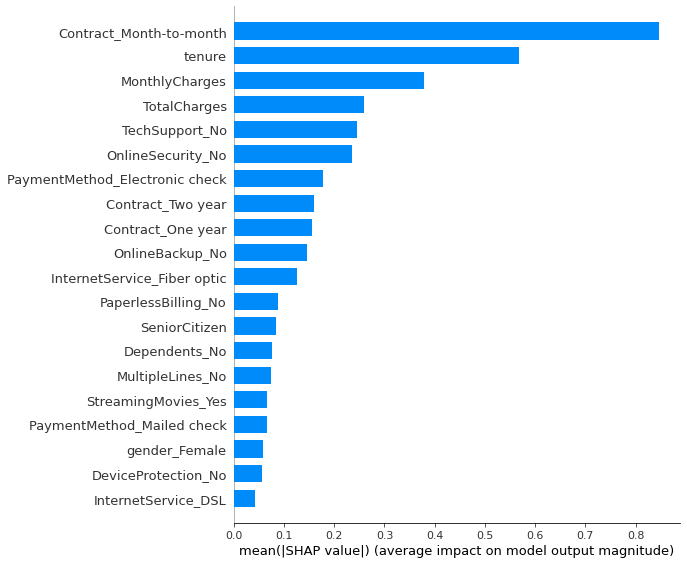

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

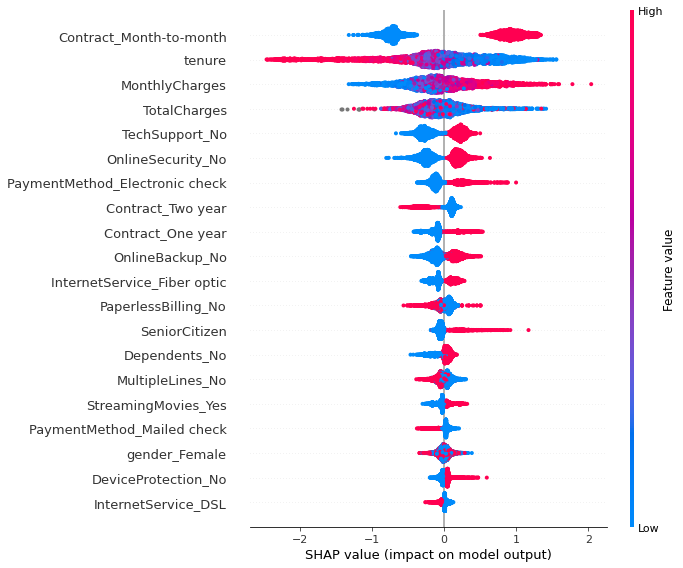

In [ ]:
shap.summary_plot(shap_values[1], X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


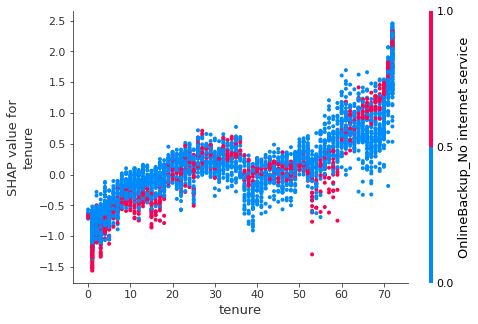

In [ ]:
shap.dependence_plot(1, shap_values[0], X_train)

#### Grid search

In [ ]:
'''
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}
'''

"\n# Hyperparameter grid\nparam_grid = {\n    'boosting_type': ['gbdt', 'goss', 'dart'],\n    'num_leaves': list(range(20, 150)),\n    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),\n    'subsample_for_bin': list(range(20000, 300000, 20000)),\n    'min_child_samples': list(range(20, 500, 5)),\n    'reg_alpha': list(np.linspace(0, 1)),\n    'reg_lambda': list(np.linspace(0, 1)),\n    'colsample_bytree': list(np.linspace(0.6, 1, 10)),\n    'subsample': list(np.linspace(0.5, 1, 100)),\n    'is_unbalance': [True, False]\n}\n"

In [ ]:
parameters = {
    'max_depth': [2,5], #range (2, 10, 1),
    'n_estimators': [100,500], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = LGBMClassifier(
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [ ]:
grid_search = model_selection.GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = scoring,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:   12.9s finished


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


GridSearchCV(cv=5, estimator=LGBMClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 5], 'n_estimators': [100, 500]},
             scoring='roc_auc', verbose=True)

<AxesSubplot:ylabel='params'>

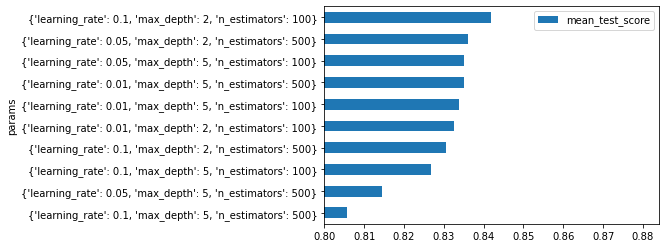

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [ ]:
predictions=grid_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[938  97]
 [185 189]]
Balanced Accuracy score: 0.7058138934098013
macro f1 score: 0.7210253601819867
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1035
         Yes       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



#### Random search

In [ ]:
from scipy.stats import uniform
uniform(loc=0, scale=4)

In [ ]:
 #list(range(1,51))
np.linspace(2,10,3)
np.linspace(100,1000,5)

array([ 100.,  325.,  550.,  775., 1000.])

In [ ]:
parameters = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1000], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = LGBMClassifier(
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [ ]:
random_search = model_selection.RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = scoring,
    n_iter=20, #default 10: number of parameter settings that are samples.
    n_jobs = 10,
    cv = 5,
    verbose=True
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(nthread=4, seed=42),
                   n_iter=20, n_jobs=10,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 500, 1000]},
                   scoring='roc_auc', verbose=True)

<AxesSubplot:ylabel='params'>

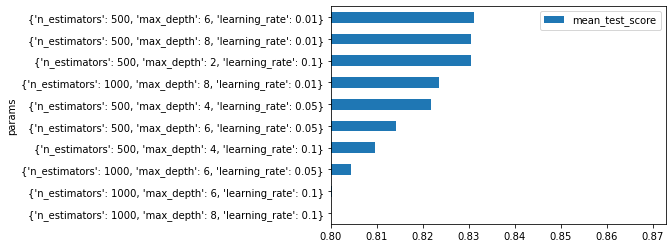

In [ ]:
results = pd.DataFrame(random_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [ ]:
predictions=random_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[938  97]
 [188 186]]
Balanced Accuracy score: 0.7018031982226356
macro f1 score: 0.7171633291707078
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1035
         Yes       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



#### Bayesian optimization

Scikit-optimize Bayes search CV

In [13]:
#!pip install scikit-optimize

     |████████████████████████████████| 102kB 4.4MB/s 


In [14]:
from skopt import BayesSearchCV


Step 1: parameters to be tuned

Note: values for parameters should make sense, e.g.: 'num_leaves' needs to be a integer and 'feature_fraction' should between 0 and 1


In [ ]:
parameters = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1000], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = LGBMClassifier(
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

### Xgboost

#### Base model with explaination

In [ ]:
# Xgboost bat buoc phai dung onehot encoder or label / ordinal encoder, khong dung duoc cho category
model=XGBClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:27:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[891 144]
 [182 192]]
Balanced Accuracy score: 0.6871192745873054
macro f1 score: 0.6930980570328995
              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1035
         Yes       0.57      0.51      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

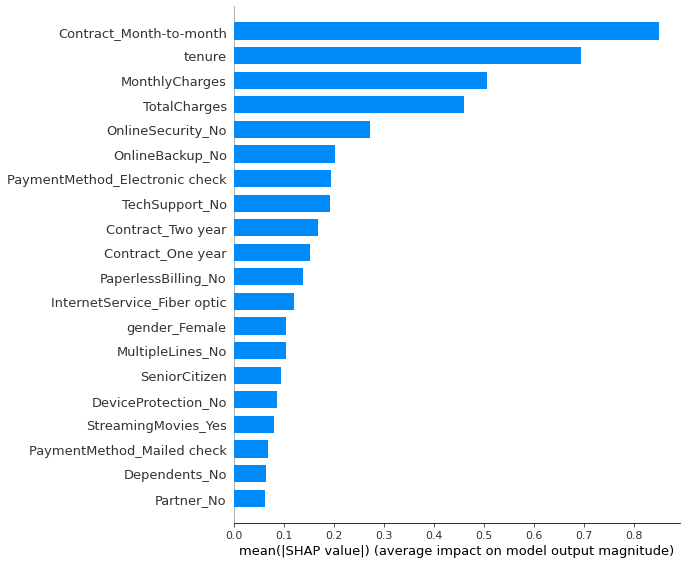

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

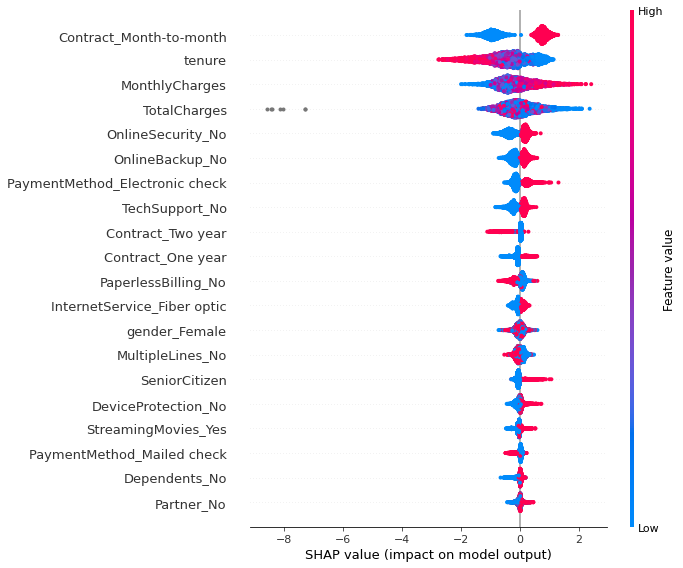

In [ ]:
shap.summary_plot(shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


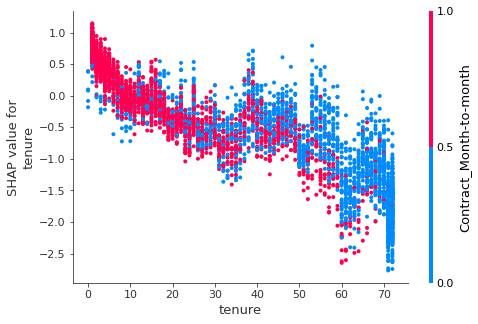

In [ ]:
shap.dependence_plot(1, shap_values, X_train)

In [ ]:
'''
for name in X_train.columns:
    print(name)
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)
'''

#### Grid search

In [ ]:
parameters = {
    'max_depth': [2,5], #range (2, 10, 1),
    'n_estimators': [100,500], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [ ]:
grid_search = model_selection.GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = scoring,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:37:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:ylabel='params'>

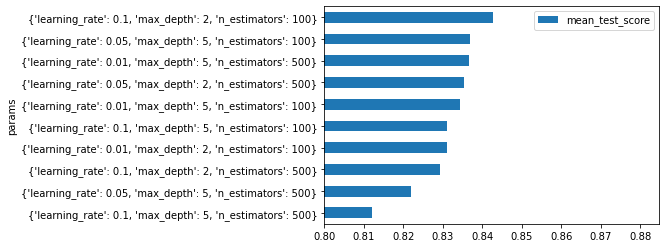

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [ ]:
predictions=grid_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[939  96]
 [189 185]]
Balanced Accuracy score: 0.7009493916143532
macro f1 score: 0.7165620268710761
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1035
         Yes       0.66      0.49      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



From analyticsvidhya

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
model= XGBClassifier(
             learning_rate =0.1,
             n_estimators=1000,
             max_depth=5,
             min_child_weight=1,
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
model.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:11:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[892 143]
 [194 180]]
Balanced Accuracy score: 0.6715595856260818
macro f1 score: 0.6788059826683632
              precision    recall  f1-score   support

          No       0.82      0.86      0.84      1035
         Yes       0.56      0.48      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



Step 2: Tune max_depth and min_child_weight

In [ ]:
param_test2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch2 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test2, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch2.fit(X_train,y_train)



In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.836791915545264)

Step 3: Tune gamma

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch3 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test3, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch3.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:19:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.1}, 0.8369726639959525)

Here, we can see the improvement in score. So the final parameters are:

    max_depth: 3
    min_child_weight: 1
    gamma: 0.1


Step 4: Tune subsample and colsample_bytree

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
             min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch4 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test4, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch4.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:21:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.6}, 0.8380368882347774)

Step 5: Tuning Regularization Parameters

Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune ‘reg_alpha’ value here and leave it upto you to try different values of ‘reg_lambda’.

In [ ]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
             min_child_weight=1, gamma=0.1, subsample=0.6, colsample_bytree=0.7,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch5 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test5, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch5.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:23:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.6,
                                     tree_metho

In [ ]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 1}, 0.8380562133856895)

Step 6: Reducing Learning Rate

Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.

In [ ]:

model = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=3,
             min_child_weight=1, gamma=0.1, subsample=0.6, colsample_bytree=0.7,reg_alpha=0.838,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

model.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:25:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0.838, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[933 102]
 [175 199]]
Balanced Accuracy score: 0.7167674184298225
macro f1 score: 0.7301857900831303
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



#### Random search

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [100,500], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [ ]:
random_search = model_selection.RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = scoring,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:47:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           nthread=4, num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
               

<AxesSubplot:ylabel='params'>

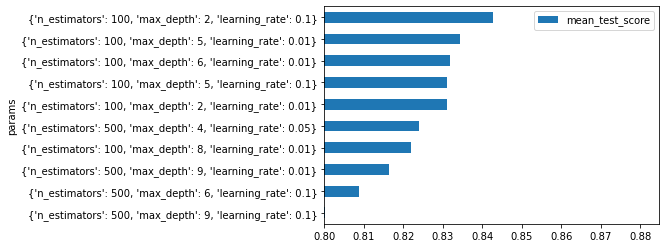

In [ ]:
results = pd.DataFrame(random_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [ ]:
predictions=random_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[929 106]
 [179 195]]
Balanced Accuracy score: 0.7094874576971764
macro f1 score: 0.7223933219266864
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Random forest, LR, all method

Drop na for random forest and logistic regression

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df=df.dropna()
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7032, 20)
(7032,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert total charge object to numeric
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [ ]:
# Random forest khong dung duoc neu con Nan value
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[926 107]
 [192 182]]
Balanced Accuracy score: 0.6915246077309741
macro f1 score: 0.7050072469713129
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# LogisticRegression khong dung duoc neu con Nan value
model=LogisticRegression(C=1,max_iter=100000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[923 110]
 [171 203]]
Balanced Accuracy score: 0.7181473927245807
macro f1 score: 0.7294321501674252
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1033
         Yes       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    #'NB':GaussianNB(),
    #'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    "Catboost": CatBoostClassifier()
    
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
0,LR,0.718733,0.718733,0.746618,0.729881,0.726077,0.726077,0.756210,0.738138,0.193045,1.842925
1,LDA,0.718291,0.718291,0.738066,0.726423,0.723666,0.723666,0.744088,0.732357,0.073542,1.221627
6,Catboost,0.712539,0.712539,0.743321,0.724575,0.843666,0.843666,0.879059,0.858981,4.667421,23.969369
5,LGBM,0.703956,0.703956,0.735745,0.716088,0.883058,0.883058,0.902557,0.892060,0.130142,1.278439
4,XGB,0.694536,0.694536,0.714540,0.702745,0.955259,0.955259,0.962970,0.959023,0.675639,3.982846
3,RF,0.687679,0.687679,0.724059,0.700615,0.996849,0.996849,0.997315,0.997081,0.398060,2.923115
2,CART,0.661094,0.661094,0.658394,0.659208,0.995953,0.995953,0.998356,0.997146,0.027064,0.687225


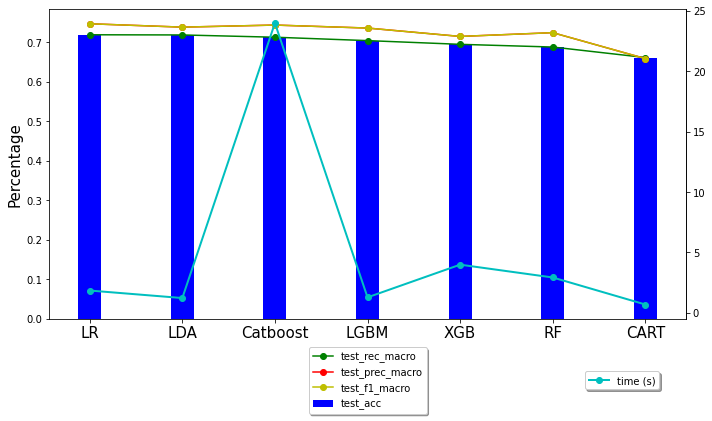

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

## No convert

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)

In [ ]:
'''
# evaluate the model
model = LGBMClassifier()
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
'''

"\n# evaluate the model\nmodel = LGBMClassifier()\ncv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)\nn_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')\n# report performance\nprint('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))\n"

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges

## Convert to category (factor) only

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=X_train.astype("category")
X_test=X_test.astype("category")

In [ ]:
# evaluate the model
#model = LGBMClassifier()
#cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
#n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
#from matplotlib import pyplot
# plot model performance for comparison
#pyplot.boxplot(n_scores, showmeans=True)
#pyplot.show()

### Lightgbm

In [ ]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=LGBMClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[900 135]
 [170 204]]
Balanced Accuracy score: 0.7075098814229248
macro f1 score: 0.7136684511931453
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1035
         Yes       0.60      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
imp_vals= model.feature_importances_
varimp_grid_df=pd.DataFrame({'feature': X_train.columns, 'importance': imp_vals})
varimp_grid_df=varimp_grid_df.sort_values(by='importance',ascending=False)
varimp_grid_df.head(10)

,feature,importance
4,tenure,367
6,MultipleLines,222
0,gender,215
14,Contract,196
7,InternetService,194
9,OnlineBackup,192
8,OnlineSecurity,178
13,StreamingMovies,167
15,PaperlessBilling,166
2,Partner,165


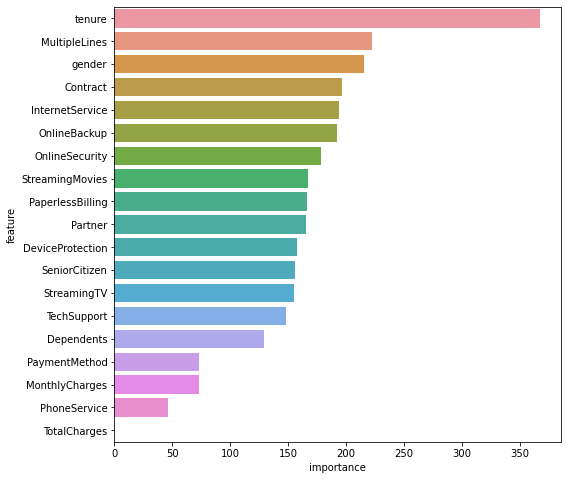

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x='importance',y='feature',data=varimp_grid_df,ax=ax)
plt.show()

In [ ]:
#!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


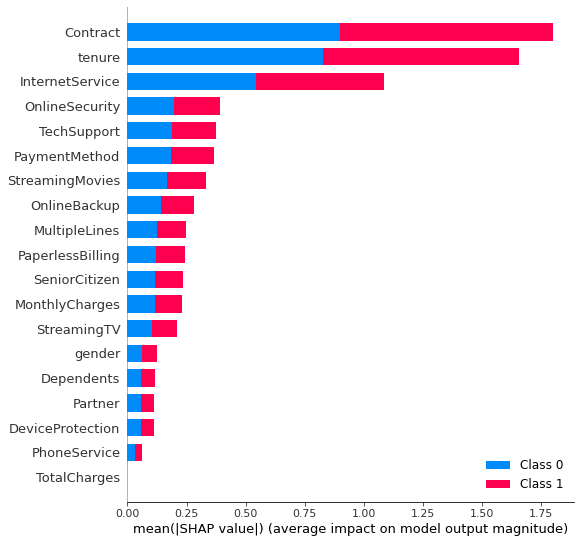

In [ ]:
shap.summary_plot(shap_values, X_train)

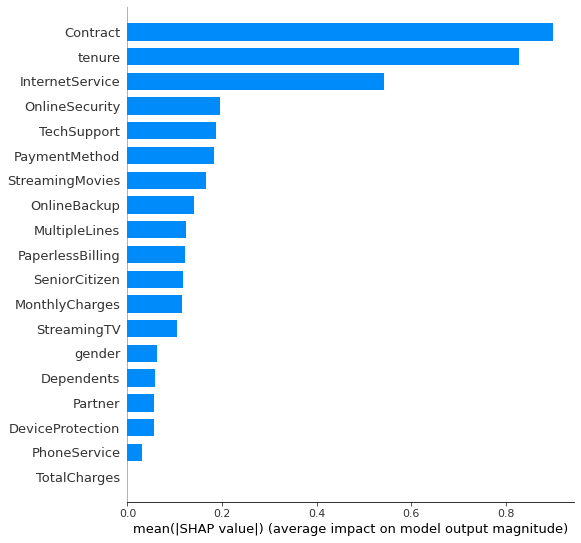

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

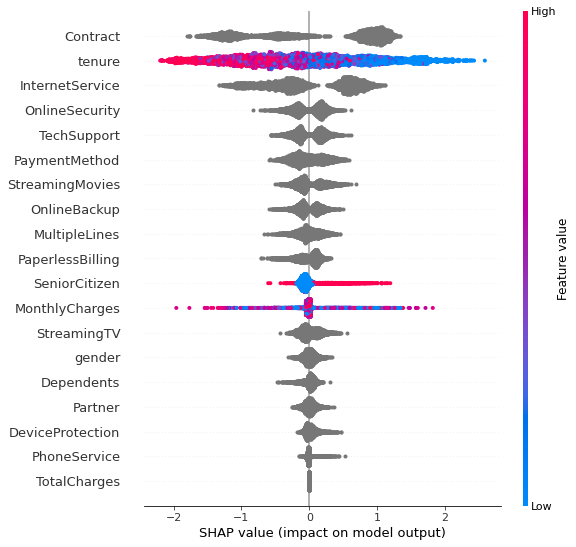

In [ ]:
shap.summary_plot(shap_values[1], X_train)

In [ ]:
#for name in X_train.columns:
#    shap.dependence_plot(name, shap_values[1], X_train, display_features=X_train)

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_test.iloc[:100,:])

Other light gbm

In [ ]:
import lightgbm as lgb

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_val=X_val.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=X_train.astype("category")
X_val=X_val.astype("category")
X_test=X_test.astype("category")
# label encoder y train, y test
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
# Model
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
model_2 = lgb.train(params, d_train, 10000, valid_sets=[d_val], 
                    early_stopping_rounds=50, verbose_eval=1000)
predictions=(model_2.predict(X_test)>=0.5).astype(int) # convert propability to True/False and 1/0

print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

(7043, 20)
(7043,)


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.417106
[[932 103]
 [192 182]]
Balanced Accuracy score: 0.6935570539151101
macro f1 score: 0.7078573582301142
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Prediction bằng binary_logloss: array([0.21159053, 0.04097542, 0.07211375, ..., 0.23537171, 0.22034149,
       0.46425456])
  

In [ ]:
# Xgboost bat buoc phai dung onehot encoder or label / ordinal encoder, khong dung duoc cho category
'''
model=XGBClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))
'''

'\nmodel=XGBClassifier()\nmodel.fit(X_train,y_train)\npredictions=model.predict(X_test)\nprint(confusion_matrix(y_test,predictions))\nprint(\'Balanced Accuracy score:\',balanced_accuracy_score(y_test,predictions))\nprint(\'macro f1 score:\',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset\nprint(classification_report(y_test,predictions))\n'

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

# 3.2 Model with Worflow (fail)

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes
X_train.isnull().sum()

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
731,6621-YOBKI,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,92.75
5546,7880-XSOJX,Male,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,42.40,146.4
3023,0238-WHBIQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.3
3914,1755-FZQEC,Male,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,791.15
4787,5542-DHSXL,Female,0,Yes,No,4,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.70,235.05


- Replace '' in Total charges column
- Convert to category or ordinal encoder or one hot encoder
- No need to remove NA value for tree method


In [ ]:
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [ ]:
def to_category(x):
  return x.astype("category")

to_category_transform = preprocessing.FunctionTransformer(to_category)

In [ ]:
X_train_a = to_category_transform.fit_transform(X_train)
X_train_a["gender"]

731       Male
5546      Male
3023      Male
3914      Male
4787    Female
         ...  
913       Male
3170      Male
1222      Male
5109      Male
6524      Male
Name: gender, Length: 4507, dtype: category
Categories (2, object): ['Female', 'Male']

In [ ]:
#Standard scaler all numeric value
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler())])

#Convert to category all category value
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = pipeline.Pipeline(steps=[("astype_category",to_category_transform)])


transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
]
preprocessor = compose.ColumnTransformer(transformers)

In [ ]:
# Create transform X value
X_train_tran = preprocessor.fit_transform(X_train)
X_test_tran=preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tran)

In [ ]:
pd.DataFrame(X_test_tran)[5]

0       Female
1       Female
2         Male
3       Female
4         Male
         ...  
1404      Male
1405      Male
1406      Male
1407      Male
1408    Female
Name: 5, Length: 1409, dtype: object

In [ ]:
# Keep track transformer colum names:
def get_transformer_feature_names(columnTransformer): #mean: preprocessor 

    output_features = []

    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features
print(len(get_transformer_feature_names(preprocessor)))
get_transformer_feature_names(preprocessor)

20


['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
#Apply name to X_train and X_test after transformer
X_train_tran_df=pd.DataFrame(X_train_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_test_tran_df=pd.DataFrame(X_test_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_train_tran_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.42989,-1.12507,-1.48178,-0.972213,6621-YOBKI,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1,-0.42989,-1.1657,-0.742942,-0.948456,7880-XSOJX,Male,No,No,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check
2,-0.42989,1.59694,0.841966,1.7939,0238-WHBIQ,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3,-0.42989,0.256246,-1.49686,-0.662946,1755-FZQEC,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
4,-0.42989,-1.1657,-0.330799,-0.9092,5542-DHSXL,Female,Yes,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check
